# CNN Practice

#### Loading dataset and libraries

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

#### load dataset


In [7]:
iris = load_iris()

#### Variable assignment

In [20]:
X = iris['data']
y = iris['target']
feature_names = iris['feature_names']
names = iris['target_names']

#### One Hot Encoding

In [24]:
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

#### Scaling

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Training test split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.25)

## Building Model

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [87]:
def create_model():
    # Start any model with sequential
    model = Sequential()
    
    # Build input and hidden layers this way
    model.add(Dense(32, input_dim=4, activation='relu')) # Dense(output_dim, input_dim, activation)
    model.add(Dense(32, activation='relu'))
    
    # Output layer
    model.add(Dense(3, activation='softmax')) # Dense(output_dim, activation)
    
    # Compile model
    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'sgd',
        metrics = ['acc'])
    
    return model

In [88]:
create_model().summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_56 (Dense)             (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


#### Train model

In [89]:
model = create_model()

# Fit model
output = model.fit(
    X_train,
    Y_train,
    batch_size = 5,
    epochs = 25,
    validation_data=(X_test, Y_test))

scores = model.evaluate(X_test, Y_test)
print('Loss: ', scores[0])
print('Accuracy', scores[1])

Train on 112 samples, validate on 38 samples
Epoch 1/25
112/112 [==============================] - 0s 845us/step - loss: 1.2113 - acc: 0.2411 - val_loss: 1.1941 - val_acc: 0.2895
Epoch 2/25
112/112 [==============================] - 0s 231us/step - loss: 1.1494 - acc: 0.3214 - val_loss: 1.1221 - val_acc: 0.4211
Epoch 3/25
112/112 [==============================] - 0s 251us/step - loss: 1.0973 - acc: 0.3750 - val_loss: 1.0479 - val_acc: 0.5000
Epoch 4/25
112/112 [==============================] - 0s 237us/step - loss: 1.0222 - acc: 0.5000 - val_loss: 0.9717 - val_acc: 0.5263
Epoch 5/25
112/112 [==============================] - 0s 251us/step - loss: 0.9422 - acc: 0.5804 - val_loss: 0.9089 - val_acc: 0.5789
Epoch 6/25
112/112 [==============================] - 0s 257us/step - loss: 0.8768 - acc: 0.6696 - val_loss: 0.8590 - val_acc: 0.7368
Epoch 7/25
112/112 [==============================] - 0s 275us/step - loss: 0.8259 - acc: 0.7321 - val_loss: 0.8176 - val_acc: 0.7632
Epoch 8/25
112/11

#### Plot accuracy and loss

In [66]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

/Users/lakshaysahni/Desktop/Research/env/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


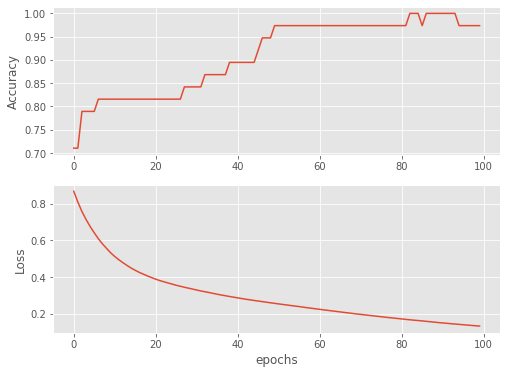

In [67]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
acc = output.history['val_acc']
loss = output.history['val_loss']
ax1.plot(acc)
ax2.plot(loss)
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
ax2.set_xlabel('epochs')

fig.show()